Accuracy of Naive Bayes classifier = 99.75 %
Accuracy of the new classifier = 100.0 %
Accuracy: 99.75%
Precision: 99.76%
Recall: 99.75%
F1: 99.75%


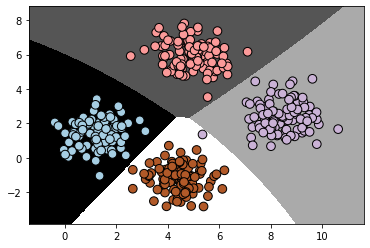

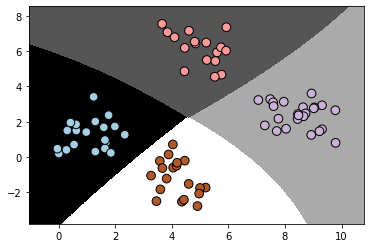

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score 

from utilities import visualize_classifier

# Input file containing data
input_file = r'C:\Users\tsebo\Documents\projects\AIpython\UntitledFolder 1\data_multivar_nb.txt'

# Load data from input file
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1]

# Create Naive Bayes classifier
classifier = GaussianNB()

# Train the classifier
classifier.fit(X, y)

# Predict the values for training data
y_pred = classifier.predict(X)

# Compute accuracy
accuracy = 100.0 * (y == y_pred).sum() / X.shape[0]
print("Accuracy of Naive Bayes classifier =", round(accuracy, 2), "%")

# Visualize the performance of the classifier
visualize_classifier(classifier, X, y)

# Split data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
classifier_new = GaussianNB()
classifier_new.fit(X_train, y_train)
y_test_pred = classifier_new.predict(X_test)

# compute accuracy of the classifier
accuracy = 100.0 * (y_test == y_test_pred).sum() / X_test.shape[0]
print("Accuracy of the new classifier =", round(accuracy, 2), "%")

# Visualize the performance of the classifier
visualize_classifier(classifier_new, X_test, y_test)

num_folds = 3
accuracy_values = cross_val_score(classifier, X, y, scoring='accuracy', cv=num_folds)
print("Accuracy: " + str(round(100*accuracy_values.mean(), 2)) + "%")

precision_values = cross_val_score(classifier, X, y, scoring='precision_weighted', cv=num_folds)
print("Precision: " + str(round(100*precision_values.mean(), 2)) + "%")
recall_values = cross_val_score(classifier, X, y, scoring='recall_weighted', cv=num_folds)
print("Recall: " + str(round(100*recall_values.mean(), 2)) + "%")
f1_values = cross_val_score(classifier, X, y, scoring='f1_weighted', cv=num_folds)
print("F1: " + str(round(100*f1_values.mean(), 2)) + "%")